In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('./diabetes.csv')
df = data.copy()

FileNotFoundError: ignored

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = data.Outcome
x = data.drop('Outcome', axis = 1)

In [ ]:
# Normalization
mean = x.mean(axis = 0)
x -= mean

std = x.std(axis = 0)
x /= std

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim = len(x.iloc[0, :]), kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
# model.add(BatchNormalization())
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
# model.add(BatchNormalization())
model.add(Dense(8, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x, y, validation_split=0.33, epochs = 100, batch_size = 32,verbose = 1)

Epoch 1/100
17/17 [==============================] - 4s 23ms/step - loss: 0.7515 - accuracy: 0.5019 - val_loss: 0.7168 - val_accuracy: 0.6260
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.6051 - val_loss: 0.6782 - val_accuracy: 0.6811
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6753 - accuracy: 0.6615 - val_loss: 0.6419 - val_accuracy: 0.7008
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.6984 - val_loss: 0.6075 - val_accuracy: 0.7087
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7121 - val_loss: 0.5806 - val_accuracy: 0.7283
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6013 - accuracy: 0.7179 - val_loss: 0.5560 - val_accuracy: 0.7520
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5838 - accuracy: 0.7198 - val_loss: 0.5354 - val_accuracy: 0.7559
Epoch 8/100


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


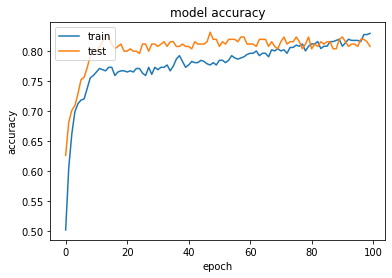

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

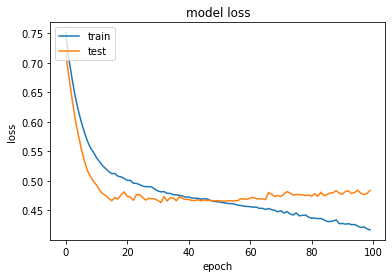

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()